<a href="https://colab.research.google.com/github/ta7er-Alalfi/House_Price_Prediction_T7/blob/main/House_Price_Prediction_t7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
pd.set_option('display.max_rows', None)

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer

In [201]:
train_url = "https://raw.githubusercontent.com/ta7er-Alalfi/T7-/refs/heads/main/house-prices-advanced-regression-techniques/train.csv"
test_url = "https://raw.githubusercontent.com/ta7er-Alalfi/T7-/refs/heads/main/house-prices-advanced-regression-techniques/test.csv"

train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

In [202]:
display(train_df.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [203]:
#عرض اخر 5 rows
display(train_df.tail())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [204]:
print(f"Train shape: {train_df.shape}")
print(f"Test shape : {train_df.shape}")

Train shape: (1460, 81)
Test shape : (1460, 81)


In [205]:
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train_df.select_dtypes(include=['object']).columns

In [206]:
cat_fill_none = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Electrical", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for col in cat_fill_none:
    train_df[col] = train_df[col].fillna("None")
    test_df[col] = test_df[col].fillna("None")

num_fill_zero = ["GarageYrBlt", "GarageArea", "GarageCars", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath", "MasVnrArea"]
for col in num_fill_zero:
    train_df[col] = train_df[col].fillna(0)
    test_df[col] = test_df[col].fillna(0)

In [207]:
imputer = KNNImputer(n_neighbors=5)
for df in [train_df, test_df]:
    df["LotFrontage"] = imputer.fit_transform(df[["LotFrontage"]])

In [208]:
for col in cat_cols:
    if col not in cat_fill_none:
        train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
        test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

for col in numeric_cols:
    if col not in num_fill_zero and col != "LotFrontage" and col != "SalePrice":
        train_df[col] = train_df[col].fillna(train_df[col].median())
        test_df[col] = test_df[col].fillna(test_df[col].median())
    elif col == "SalePrice":
        train_df[col] = train_df[col].fillna(train_df[col].median())

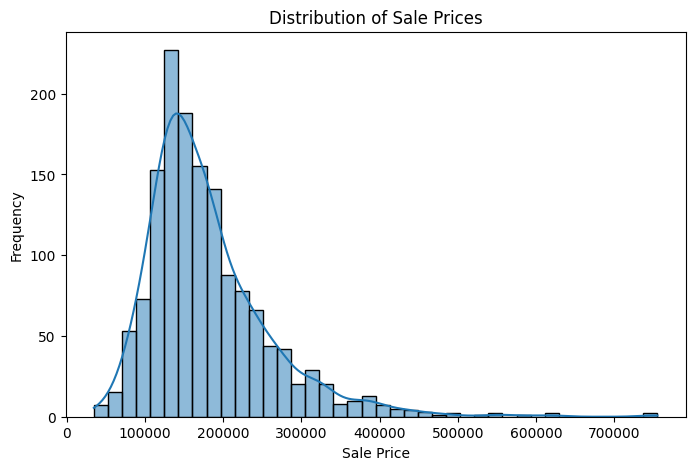

In [209]:
#توزيع الاسعار
plt.figure(figsize=(8,5))
sns.histplot(train_df["SalePrice"], kde=True, bins=40)
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()



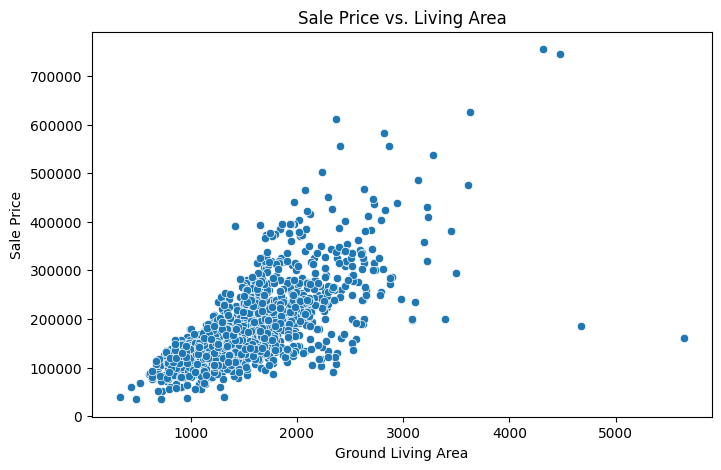

In [210]:
#السعر مقابل المساحه
plt.figure(figsize=(8,5))
sns.scatterplot(x="GrLivArea", y="SalePrice", data=train_df)
plt.title("Sale Price vs. Living Area")
plt.xlabel("Ground Living Area")
plt.ylabel("Sale Price")
plt.show()

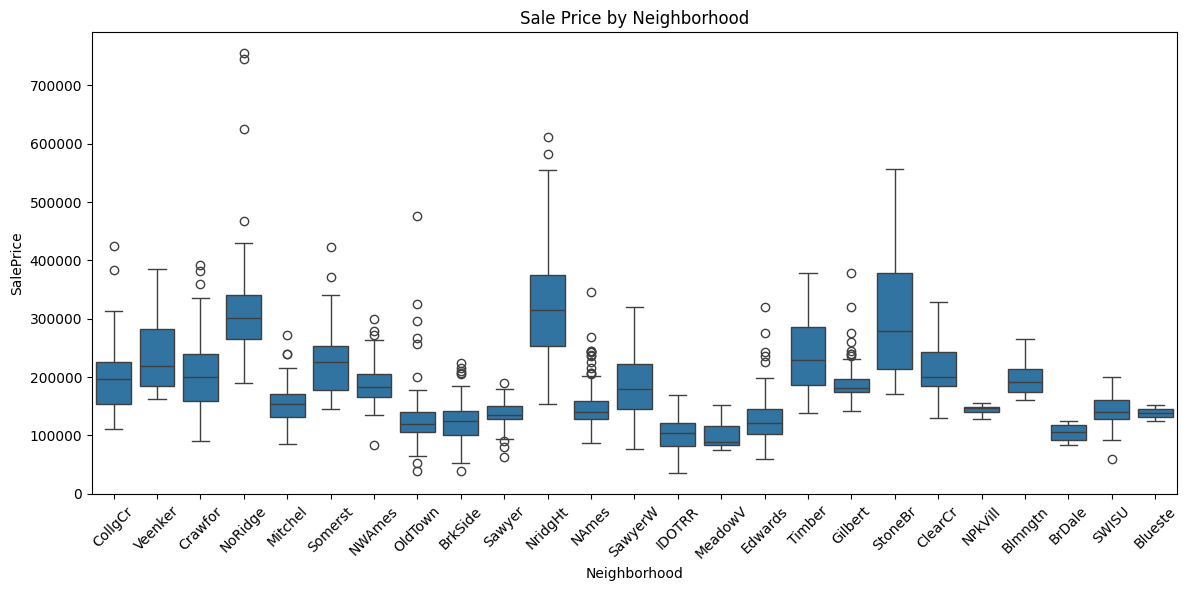

In [211]:
#السعر حسب المكان
plt.figure(figsize=(14,6))
sns.boxplot(x="Neighborhood", y="SalePrice", data=train_df)
plt.xticks(rotation=45)
plt.title("Sale Price by Neighborhood")
plt.show()

In [212]:
#عرض ةهmising values في كل colum
missing_train = train_df.isnull().sum().sort_values(ascending=False)
missing_test  = test_df.isnull().sum().sort_values(ascending=False)

print("Top missing values in Train:")
print(missing_train.head(10))
print("\nTop missing values in Test:")
print(missing_test.head(10))


Top missing values in Train:
Id             0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
Alley          0
LotShape       0
LandContour    0
Utilities      0
dtype: int64

Top missing values in Test:
Id             0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
Alley          0
LotShape       0
LandContour    0
Utilities      0
dtype: int64


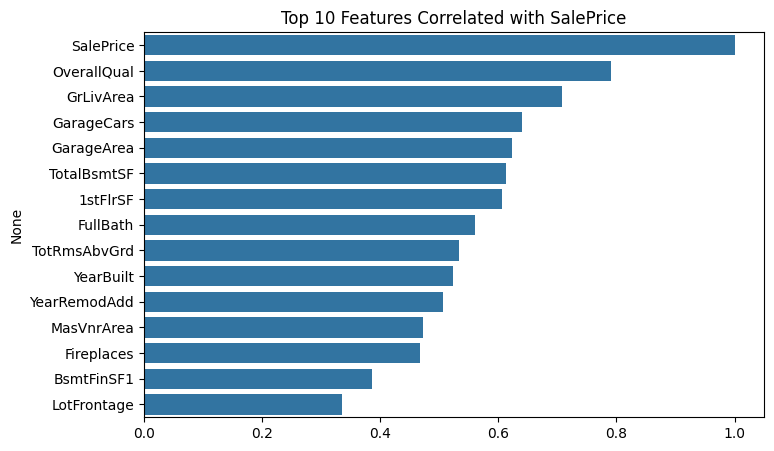

In [213]:
numeric_df =train_df.select_dtypes(include=np.number)
corr = numeric_df.corr()
top_corr_features = corr['SalePrice'].sort_values(ascending=False).head(15)

plt.figure(figsize=(8,5))
sns.barplot(x=top_corr_features.values, y=top_corr_features.index)
plt.title("Top 10 Features Correlated with SalePrice")
plt.show()

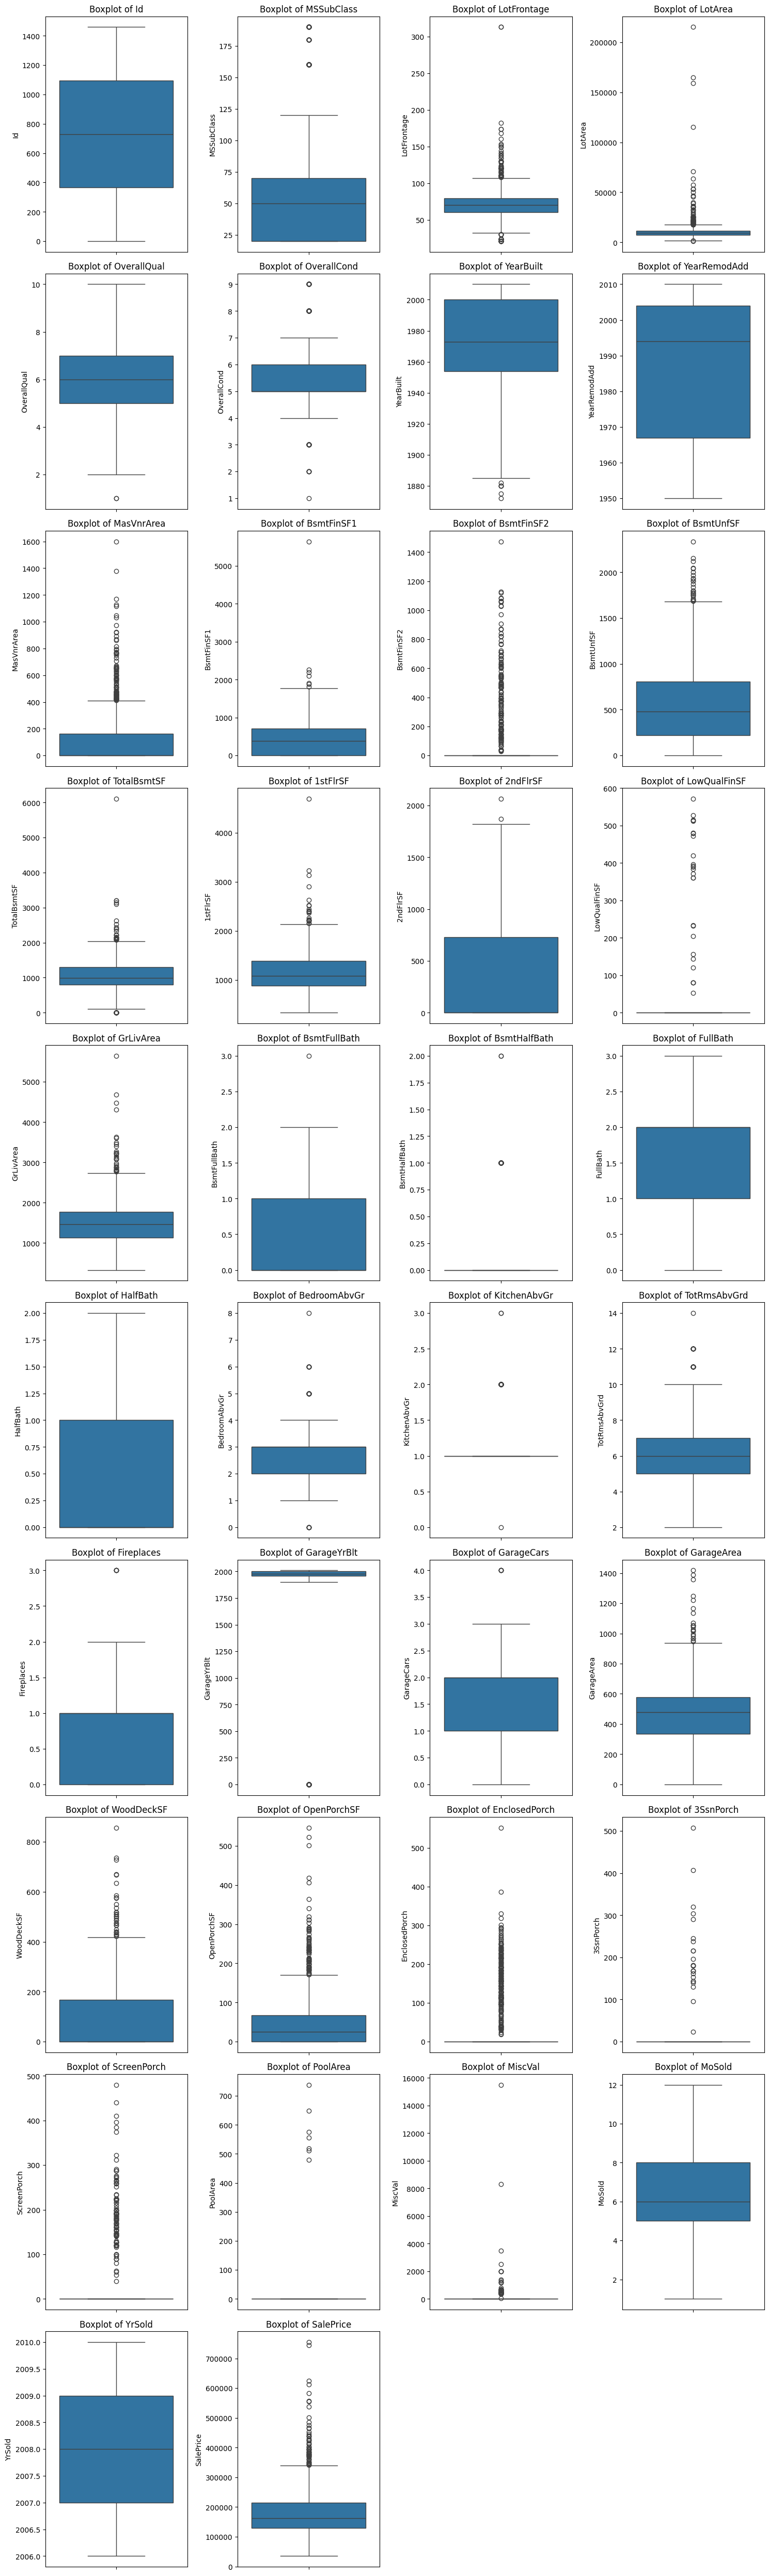

In [214]:
numeric_features = train_df.select_dtypes(include=['int64', 'float64']).columns

n_features = len(numeric_features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5 * n_rows))


for i, feature in enumerate(numeric_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=train_df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

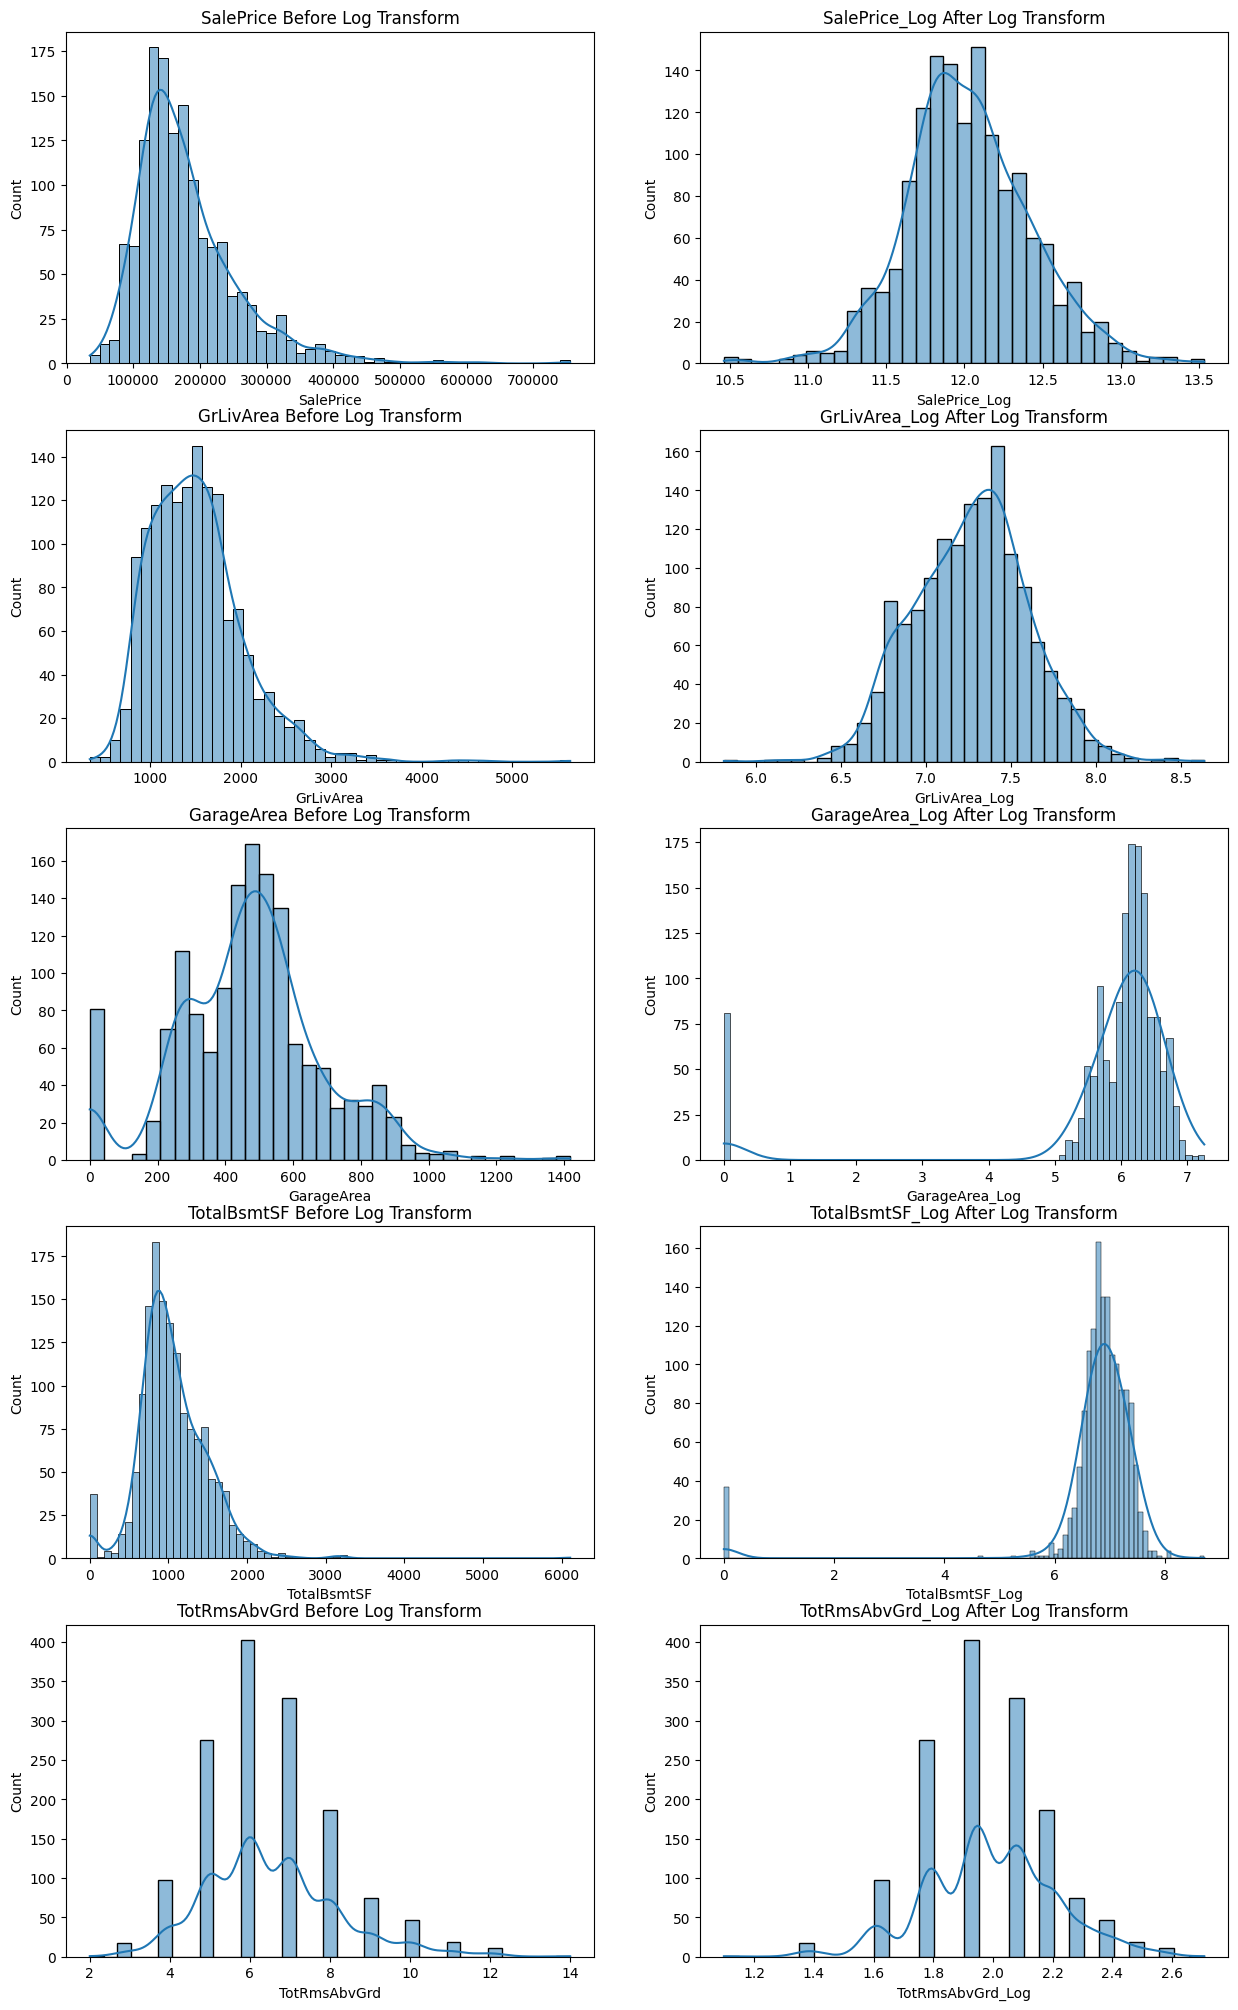

In [215]:
features_to_transform = ['SalePrice', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd']

for feature in features_to_transform:
    train_df[feature + '_Log'] = np.log1p(train_df[feature])
n_features = len(features_to_transform)
plt.figure(figsize=(15, 5 * n_features))

for i, feature in enumerate(features_to_transform, 1):

    plt.subplot(n_features, 2, 2*i-1)
    sns.histplot(train_df[feature], kde=True)
    plt.title(f'{feature} Before Log Transform')

    plt.subplot(n_features, 2, 2*i)
    sns.histplot(train_df[feature + '_Log'], kde=True)
    plt.title(f'{feature}_Log After Log Transform')

In [216]:
all_data = pd.concat([train_df.drop("SalePrice", axis=1), test_df], axis=0).copy()

In [217]:
all_data = pd.get_dummies(all_data, drop_first=True)

In [218]:
if 'Id' in train_df.columns:
    train_df.drop("Id", axis=1, inplace=True)
if 'Id' in test_df.columns:
    test_df.drop("Id", axis=1, inplace=True)

In [222]:
train_processed = all_data.iloc[:train_df.shape[0], :].copy()
test_processed = all_data.iloc[train_df.shape[0]:, :].copy()

train_processed["SalePrice"] = train_df["SalePrice"]

In [231]:
skewed_features = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'TotalSF', 'GarageArea', 'LotArea']
for feature in skewed_features:
    if feature in train_processed.columns:
        train_processed[feature] = train_processed[feature].apply(lambda x: x if x > 0 else 0.0001)
        train_processed[feature + '_Log'] = np.log1p(train_processed[feature])

In [234]:
base_cols = [col for col in train_processed.columns if not any(col == f + '_Log' for f in skewed_features) and not col.startswith('SalePrice')]
log_cols = [f + '_Log' for f in skewed_features if f + '_Log' in train_processed.columns]
X_cols = base_cols + log_cols
X = train_processed[X_cols]
y = train_processed['SalePrice_Log'] if 'SalePrice_Log' in train_processed.columns else train_processed['SalePrice']

In [236]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [237]:
print("X shape:", X.shape, "y shape:", y.shape)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X shape: (1460, 269) y shape: (1460,)


In [238]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (1168, 269)
Test shape: (292, 269)
